<a href="https://colab.research.google.com/github/KoMurase/interest/blob/master/first_Steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考
https://towardsdatascience.com/hiding-data-in-an-image-image-steganography-using-python-e491b68b1372

In [1]:
import cv2 
import numpy as np 
import types 
from google.colab.patches import cv2_imshow 

import time

In [2]:
def messageToBinary(message):
  if type(message) == str:
    return "".join([ format(ord(i), "08b") for i in message])  #0埋め　b:2進数
  
  elif type(message) == bytes or type(message) == np.ndarray:
    return [ format(i, "08b") for i in message]
  
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  
  else: 
    raise TypeError("Input type not supported")

In [3]:
messageToBinary("a")

'01100001'

In [4]:
from tqdm import tqdm
def hideData(image, secret_message):

  n_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes to encode:", n_bytes)

  #画像内にエンコードできる最大バイトよりもテキストのバイト数が大きい場合
  if len(secret_message) > n_bytes:
    raise ValueError("Error encountered insufficient bytes, you need bigger image or less data")
  
  secret_message +="#####" #区切り文字

  data_index = 0
  #隠したい文字をバイナリに変換
  binary_secret_msg = messageToBinary(secret_message)

  data_len = len(binary_secret_msg)

  for values in tqdm(image):
    for pixel in values:
      r, g, b = messageToBinary(pixel)
      if data_index < data_len:
        pixel[0] = int(r[:-1] + binary_secret_msg[data_index], 2)
        data_index += 1
      if data_index < data_len:
        pixel[1] = int(g[:-1]+binary_secret_msg[data_index], 2)
        data_index += 1
      if data_index < data_len:
        pixel[2] = int(b[:-1]+binary_secret_msg[data_index], 2)
        data_index += 1
      if data_index >= data_len:
        break 
    
  return image

In [5]:
def showData(image):

  binary_data = ""
  for values in image:
    for pixel in values: 
      r, g, b = messageToBinary(pixel)
      #r,g,bの順で暗号化したためその順番に複合していく
      binary_data += r[-1]
      binary_data += g[-1]
      binary_data += b[-1]
  
  all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8) ]

  decoded_data = ""
  for byte in all_bytes:
    decoded_data += chr(int(byte, 2))
    if decoded_data[-5:] == "#####":
      print(decoded_data[-5:])
      break

  return decoded_data[:-5]

In [6]:
def encode_text():
  image_name = input("Enter image name(with extension): ")
  image = cv2.imread(image_name)

  print("The shape of the image is : ", image.shape)
  print("The original image is as show below :")
  resized_image = cv2.resize(image, (500, 500))

  cv2_imshow(resized_image)

  data = input("Enter data to be encoded : ")
  if (len(data)==0):
    raise ValueError("Data is empty...")
  
  #filename = input("Enter the name of new encoded image(with extension) : ")
  filename = "encoded.png"
  encoded_image = hideData(image, data)
  cv2.imwrite(filename, encoded_image)

In [7]:
def decode_text():
  image_name = "encoded.png"

  image = cv2.imread(image_name)
  print("the Steganographed image is as shown below: ")
  time.sleep(2)
  resized_image = cv2.resize(image, (100, 100))
  cv2_imshow(resized_image)

  text = showData(image)

  return text

In [8]:
def Steganography():
  user_choice = int(input("Image Stegnography \n 1. Encode the data \n 2. Decode the data \n Your input is :"))
  if user_choice == 1:
    print("\n Let's encoding !")
    encode_text()
  elif user_choice == 2:
    print("\n Let's decoding !")
    print("Decode message is "+ decode_text())
  else : 
    raise Exception("Enter correct input")

Image Stegnography 
 1. Encode the data 
 2. Decode the data 
 Your input is :1

 Let's encoding !
Enter image name(with extension): image_free.png
The shape of the image is :  (450, 450, 3)
The original image is as show below :


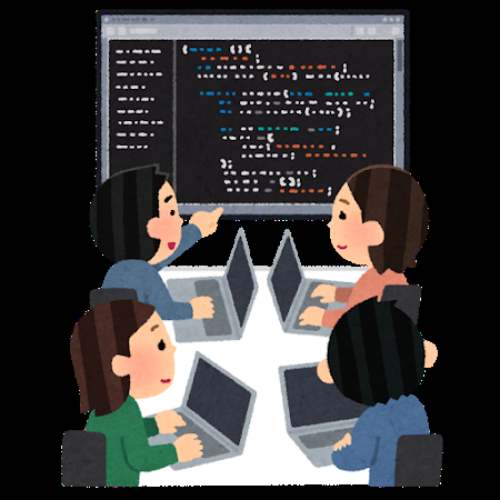

Enter data to be encoded : AhaAhahahahaaaaaaa!!!


100%|██████████| 450/450 [00:00<00:00, 95833.30it/s]

Maximum bytes to encode: 75937


In [13]:
Steganography()

Image Stegnography 
 1. Encode the data 
 2. Decode the data 
 Your input is :2

 Let's decoding !
the Steganographed image is as shown below: 


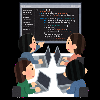

#####
Decode message is AhaAhahahahaaaaaaa!!!


In [14]:
message = Steganography()

In [11]:
message